In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [35]:
# Load the NetCDF file
file_path = r'D:\data\satellite_and_WOA13_1_degree_Jan_v2.nc'
data = xr.open_dataset(file_path)

# Extract the features and target variables
features = ['CHL', 'APH', 'FLU', 'PIC', 'POC', 'PAR', 'SST']
targets = ['nitrate', 'phosphate', 'silicate']

# Create a DataFrame for features
feature_data = pd.concat([data[var].to_dataframe().reset_index(drop=True) for var in features], axis=1)
feature_data.columns = features

# Create a DataFrame for targets
target_data = pd.concat([data[var].to_dataframe().reset_index(drop=True) for var in targets], axis=1)
target_data.columns = targets

# Handle missing values by filling them with the mean value of each column
feature_data = feature_data.fillna(feature_data.mean())
target_data = target_data.fillna(target_data.mean())

# Combine features and targets for splitting
combined_data = pd.concat([feature_data, target_data], axis=1)

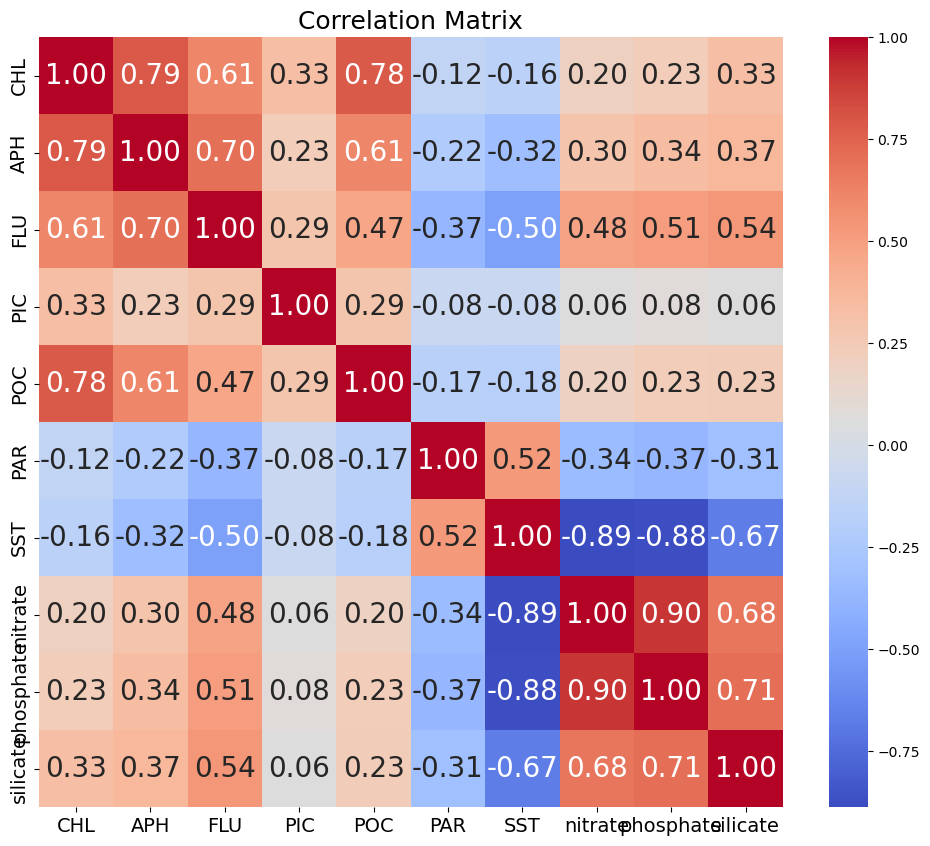

In [51]:
import pandas as pd
import seaborn as sns
file_path = r'D:\data\satellite_and_WOA13_1_degree_Jan_v2.nc'
data = xr.open_dataset(file_path)

# Convert the data to a Pandas DataFrame
df = data.to_dataframe().reset_index()
df = df.drop(columns=['lat', 'lon','depth'])
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix with larger font size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 20})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [38]:
data

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    CHL        (lat, lon) float64 ...
    APH        (lat, lon) float64 ...
    FLU        (lat, lon) float64 ...
    PIC        (lat, lon) float64 ...
    POC        (lat, lon) float64 ...
    PAR        (lat, lon) float64 ...
    SST        (lat, lon) float64 ...
    nitrate    (lat, lon) float32 ...
    phosphate  (lat, lon) float32 ...
    silicate   (lat, lon) float32 ...
    depth      (lat, lon) float64 ...

In [36]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Separate features and targets
X_train = train_data[features].values
y_train = train_data[targets].values
X_test = test_data[features].values
y_test = test_data[targets].values

In [31]:
train_data

,CHL,APH,FLU,PIC,POC,PAR,SST,nitrate,phosphate,silicate
60077,0.306667,0.017910,0.097266,0.000321,71.058904,39.204798,16.681942,0.031995,0.820505,39.610558
27373,0.024336,0.004475,0.038215,0.000089,24.349857,47.567478,29.636250,0.044857,0.195495,1.904060
39594,0.036828,0.004950,0.034815,0.000032,25.099850,37.566486,26.520000,0.022119,0.182184,2.602883
43434,0.306667,0.017910,0.097266,0.000321,71.058904,39.204798,16.681942,6.661689,0.652729,10.705253
54311,0.306667,0.017910,0.097266,0.000321,71.058904,39.204798,16.681942,6.661689,0.652729,10.705253
...,...,...,...,...,...,...,...,...,...,...
62570,0.306667,0.017910,0.097266,0.000321,71.058904,39.204798,16.681942,1.853556,0.416481,22.209637
38158,0.039629,0.005200,0.041148,0.000030,26.149769,41.857498,26.725000,0.020078,0.192176,2.026723
860,0.306667,0.017910,0.097266,0.000321,71.058904,39.204798,16.681942,6.661689,0.652729,10.705253
15795,0.313441,0.027925,0.151796,0.000265,83.049728,46.281013,11.338758,10.494459,0.818752,3.926445


In [41]:
nlat, nlon = data.dims['lat'], data.dims['lon']
# Create masks for training and testing data
train_mask = np.zeros((nlat, nlon), dtype=bool)
test_mask = np.zeros((nlat, nlon), dtype=bool)

# Convert the indices of the train and test data back to 2D indices
train_indices = train_data.index
test_indices = test_data.index

# Fill the masks based on the 2D indices
for idx in train_indices:
    i, j = divmod(idx, nlon)
    train_mask[i, j] = True

for idx in test_indices:
    i, j = divmod(idx, nlon)
    test_mask[i, j] = True

C:\Users\10121\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\10121\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


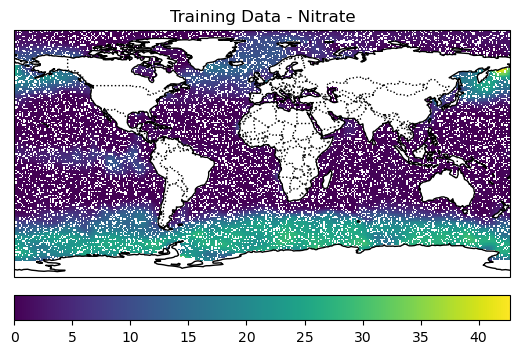

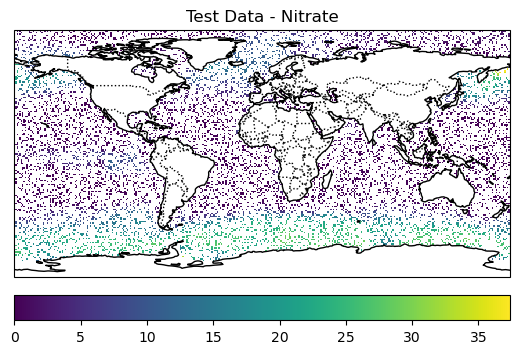

In [44]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Mask the nitrate data
train_nitrate = np.where(train_mask, data['nitrate'], np.nan)
test_nitrate = np.where(test_mask, data['nitrate'], np.nan)

# Extract lon and lat
lon = data['lon'].values
lat = data['lat'].values

# Function to plot data
def plot_data(lon, lat, data, title, cmap='viridis'):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, transform=ccrs.PlateCarree())
    fig.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(title)
    plt.show()

# Plot the nitrate data

# Plot training data
plot_data(lon, lat, train_nitrate, 'Training Data - Nitrate')

# Plot test data
plot_data(lon, lat, test_nitrate, 'Test Data - Nitrate')

C:\Users\10121\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 58.1426 - val_loss: 27.0872
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 26.6584 - val_loss: 23.2607
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.3220 - val_loss: 19.8430
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 20.5213 - val_loss: 20.7103
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 19.6498 - val_loss: 18.1586
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 18.6424 - val_loss: 16.8318
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 17.4707 - val_loss: 17.6138
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 16.5281 - val_loss: 17.3990
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 15.9531 - val_loss: 16.5776
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 16.4083 - val_loss: 17.5826
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 16.0485 - val_loss: 15.4630
Epoch 12

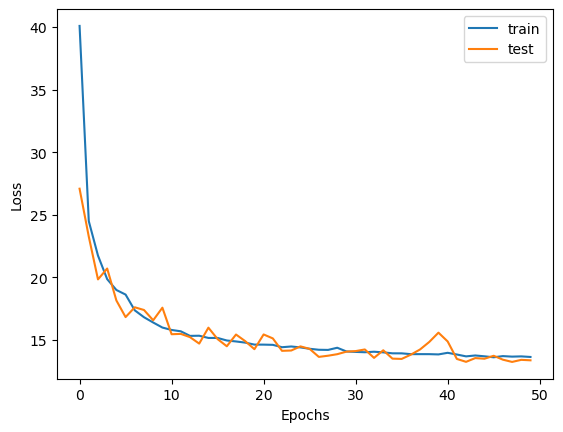

In [8]:
# Define the CNN model (removing the time dimension, using Dense layers directly)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))  # 3 output neurons for the 3 target variables

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the trained model
model.save('trained_model.h5')

print("Model saved as 'trained_model.h5'")

Model saved as 'trained_model.h5'


In [45]:
# Accessing and printing the weights
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # returns a list of numpy arrays
    print(f"Layer {i + 1} weights:")
    print(f"Weights: {weights[0].shape}\n{weights[0]}")
    print(f"Biases: {weights[1].shape}\n{weights[1]}\n")

Layer 1 weights:
Weights: (7, 64)
[[-8.78666937e-02  7.85250440e-02  8.47490355e-02  1.07840337e-01
  -4.81876433e-02 -5.64051330e-01  1.21857360e-01  6.14477634e-01
   5.86842954e-01  1.16478634e+00 -7.93208480e-01 -2.93921876e+00
  -2.34185189e-01  1.39711320e-01 -7.99192190e-02  1.24710500e+00
   8.04809630e-02 -1.47808284e-01 -3.41406763e-01  2.27671832e-01
   2.38296509e-01  1.90263045e+00 -1.52347505e+00 -4.95711148e-01
   5.40412724e-01 -2.35492647e-01  3.77224416e-01  4.46083248e-02
  -2.31244534e-01 -1.56222269e-01  1.34613052e-01 -4.37601358e-02
  -2.77108997e-01 -1.13278806e+00 -2.79671609e-01 -1.96777314e-01
  -4.42931265e-01 -4.17868167e-01 -8.10071707e-01  2.49622226e-01
  -3.62288892e-01 -1.06799686e+00  1.41792178e-01 -1.03442788e+00
   1.50749624e+00 -2.32165679e-01 -2.50060171e-01 -2.33473301e+00
  -2.60760522e+00 -1.06344476e-01 -1.07873283e-01 -1.71328172e-01
  -3.91064286e-02  2.84955597e+00  2.60157436e-01 -1.27392387e+00
  -6.34421766e-01 -8.16369593e-01 -3.06425

In [46]:
# Get the weights of the first layer
first_layer_weights = model.layers[0].get_weights()[0]

# Compute the magnitude of weights for each feature
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

  Feature  Importance
3     PIC    2.009414
2     FLU    1.060042
1     APH    0.950182
0     CHL    0.575627
6     SST    0.480510
5     PAR    0.203841
4     POC    0.107854


In [47]:
first_layer_weights

array([[-8.78666937e-02,  7.85250440e-02,  8.47490355e-02,
         1.07840337e-01, -4.81876433e-02, -5.64051330e-01,
         1.21857360e-01,  6.14477634e-01,  5.86842954e-01,
         1.16478634e+00, -7.93208480e-01, -2.93921876e+00,
        -2.34185189e-01,  1.39711320e-01, -7.99192190e-02,
         1.24710500e+00,  8.04809630e-02, -1.47808284e-01,
        -3.41406763e-01,  2.27671832e-01,  2.38296509e-01,
         1.90263045e+00, -1.52347505e+00, -4.95711148e-01,
         5.40412724e-01, -2.35492647e-01,  3.77224416e-01,
         4.46083248e-02, -2.31244534e-01, -1.56222269e-01,
         1.34613052e-01, -4.37601358e-02, -2.77108997e-01,
        -1.13278806e+00, -2.79671609e-01, -1.96777314e-01,
        -4.42931265e-01, -4.17868167e-01, -8.10071707e-01,
         2.49622226e-01, -3.62288892e-01, -1.06799686e+00,
         1.41792178e-01, -1.03442788e+00,  1.50749624e+00,
        -2.32165679e-01, -2.50060171e-01, -2.33473301e+00,
        -2.60760522e+00, -1.06344476e-01, -1.07873283e-0

In [ ]:
# Load the model
model = load_model('trained_model.h5')

# Print the model summary to verify it was loaded correctly
model.summary()

NameError: name 'load_model' is not defined

In [10]:
data

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    CHL        (lat, lon) float64 ...
    APH        (lat, lon) float64 ...
    FLU        (lat, lon) float64 ...
    PIC        (lat, lon) float64 ...
    POC        (lat, lon) float64 ...
    PAR        (lat, lon) float64 ...
    SST        (lat, lon) float64 ...
    nitrate    (lat, lon) float32 ...
    phosphate  (lat, lon) float32 ...
    silicate   (lat, lon) float32 ...
    depth      (lat, lon) float64 ...

In [23]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Separate the predictions for nitrate, phosphate, and silicate
predicted_nitrate = predictions[:, 0]
predicted_phosphate = predictions[:, 1]
predicted_silicate = predictions[:, 2]

# Reshape predictions if needed to match the grid shape
# Assuming lon and lat are 1D arrays and X_test is a meshgrid of lon and lat
lon = data['lon'].values
lat = data['lat'].values

405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


In [24]:
predictions.shape
predicted_nitrate.shape
lon.shape

(360,)

In [20]:
len(lon)

360

In [25]:
# Assuming predictions were made on a regular grid
lon_grid, lat_grid = np.meshgrid(lon, lat)
predicted_nitrate = predicted_nitrate.reshape(len(lat), len(lon))
predicted_phosphate = predicted_phosphate.reshape(len(lat), len(lon))
predicted_silicate = predicted_silicate.reshape(len(lat), len(lon))

ValueError: cannot reshape array of size 12960 into shape (180,360)

In [9]:


def plot_data(lon, lat, data, title, cmap='viridis'):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, transform=ccrs.PlateCarree())
    fig.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(title)
    plt.show()

# Plot the predicted nitrate
plot_data(lon, lat, predicted_nitrate, 'Predicted Nitrate')

# Plot the predicted phosphate
plot_data(lon, lat, predicted_phosphate, 'Predicted Phosphate')

# Plot the predicted silicate
plot_data(lon, lat, predicted_silicate, 'Predicted Silicate')

405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


ValueError: cannot reshape array of size 12960 into shape (180,180)